In [ ]:
import tensorflow as tf 
from tensorflow import keras 

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
# Load data set- 7000 images greyscale 28x28px, 10 classes 
fashion=keras.datasets.fashion_mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape # keep back 5000 images for validation

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from matplotlib import pyplot 

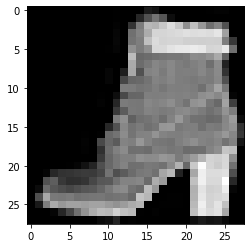

In [ ]:
pyplot.imshow(X_test[2314],cmap=pyplot.get_cmap('gray'))

In [ ]:
# create validation data set first 5000 images
# divide images by 255.0 to scale each pixel as less than 1
X_valid,X_train=X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [ ]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
#labels dont need to be scaled 

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
y_valid.shape

(5000,)

In [ ]:
# define the classes - eg if 1 then 'tshirt' 
class_names=["Tshirt/top","Trousers","Pullover/jumper","Dress","Coat",
             "Sandal","Shirt","Sneakers","Bag","Ankle Boots"]

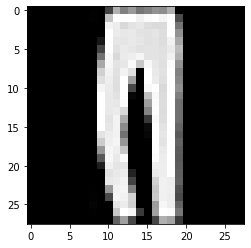

In [ ]:
#validate class using image 
pyplot.imshow(X_test[2],cmap=pyplot.get_cmap('gray'))

In [ ]:
class_names[y_test[2]]

'Trousers'

In [ ]:
# Neural network, using the Sequential API (keras)
# a single stack of linear layers which interpret the image 

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))# allows us to classify 1-10
# if using dense layers - can overfit 

In [ ]:
# compile rather than fit straightaway 

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])

In [ ]:
history=model.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid))

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7157 - accuracy: 0.7639 - val_loss: 0.5015 - val_accuracy: 0.8346
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4880 - accuracy: 0.8299 - val_loss: 0.4479 - val_accuracy: 0.8424
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4425 - accuracy: 0.8457 - val_loss: 0.4288 - val_accuracy: 0.8486
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4160 - accuracy: 0.8553 - val_loss: 0.3975 - val_accuracy: 0.8652
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3979 - accuracy: 0.8604 - val_loss: 0.3843 - val_accuracy: 0.8686
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3800 - accuracy: 0.8671 - val_loss: 0.3729 - val_accuracy: 0.8722
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3669 - accuracy: 0.8712 - val_loss: 0.3616 - val_accuracy

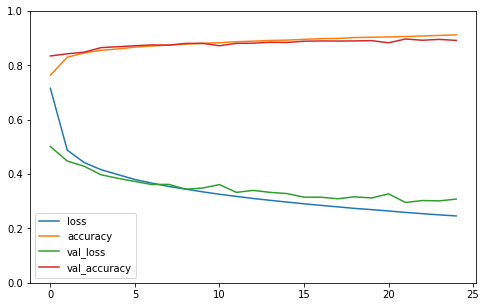

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
pyplot.grid=(True)
pyplot.gca().set_ylim(0,1)
pyplot.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# use model to predict the class of test data set
X_test.shape

(10000, 28, 28)

In [ ]:
X_test_sample=X_test[100:120]
y_prob=model.predict(X_test_sample)
y_prob.round(5)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y_pred=model.predict(X_test_sample)
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8])

In [ ]:
actual=y_test[100:120]

In [ ]:
actual

array([3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8],
      dtype=uint8)

In [ ]:
np.array(class_names)[actual]

array(['Dress', 'Shirt', 'Sneakers', 'Pullover/jumper', 'Sneakers', 'Bag',
       'Sandal', 'Ankle Boots', 'Ankle Boots', 'Coat', 'Pullover/jumper',
       'Sandal', 'Sneakers', 'Tshirt/top', 'Sandal', 'Pullover/jumper',
       'Bag', 'Shirt', 'Sneakers', 'Bag'], dtype='<U15')

In [ ]:
np.array(class_names)[classes_x]

array(['Dress', 'Shirt', 'Sneakers', 'Pullover/jumper', 'Sneakers', 'Bag',
       'Sandal', 'Ankle Boots', 'Ankle Boots', 'Coat', 'Pullover/jumper',
       'Sandal', 'Sneakers', 'Tshirt/top', 'Sandal', 'Pullover/jumper',
       'Bag', 'Coat', 'Sneakers', 'Bag'], dtype='<U15')

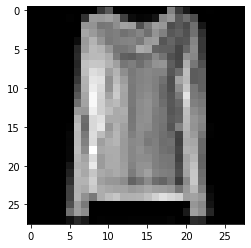

In [ ]:
pyplot.imshow(X_test[103],cmap=pyplot.get_cmap('gray'))

In [ ]:
#compare the arrays for all predictions for X test against all real y_test 
predicted_all=model.predict(X_test)
predicted_class=np.argmax(predicted_all,axis=1)
actual_all=y_test

In [ ]:
matches=(predicted_class==actual_all)

In [ ]:
non_matches=(predicted_class!=actual_all)

In [ ]:
matches.sum()/float(len(matches))

0.8427

In [ ]:
# 16% inaccurately labelled 